This notebook is used to analyse the resulting dataframe from the main bouy data survey

In [9]:
import numpy as np
import pandas as pd
import xarray as xr
import os
import pickle
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib as mpl

In [10]:
write_folder = './1h_survey'
result_df_fn = 'result_df'
kml_pinmap_fn = 'kml_pinmap'

with open(os.path.join(write_folder, result_df_fn),'rb') as f_r:
    bouy_survey_df = pickle.load(f_r)

In [11]:
bouy_survey_df

,bouy_file_name,bouy_longitude,bouy_latitude,bouy_time,bouy_depth_index,bouy_depth,bouy_variable_name,bouy_variable_value,sar_url,sar_mode,sar_polarization,sar_platform,sar_start_time,sar_stop_time,sar_coordinates
0,GL_TS_MO_41159.nc,-76.948997,34.213001,2021-12-27 22:56:00,0,0.0,VHM0,1.109000,https://datapool.asf.alaska.edu/GRD_HD/SA/S1A_...,IW,"[VV, VH]",Sentinel-1A,2021-12-27 23:05:44,2021-12-27 23:06:09,"[[-77.787575, 34.208473], [-77.43821, 32.70319..."
1,GL_TS_MO_41159.nc,-76.948997,34.213001,2021-12-15 22:56:00,0,0.0,VHM0,0.849000,https://datapool.asf.alaska.edu/GRD_HD/SA/S1A_...,IW,"[VV, VH]",Sentinel-1A,2021-12-15 23:05:45,2021-12-15 23:06:10,"[[-77.787628, 34.208488], [-77.438286, 32.7032..."
2,GL_TS_MO_41159.nc,-76.948997,34.213001,2021-12-03 22:56:00,0,0.0,VHM0,0.809000,https://datapool.asf.alaska.edu/GRD_HD/SA/S1A_...,IW,"[VV, VH]",Sentinel-1A,2021-12-03 23:05:46,2021-12-03 23:06:11,"[[-77.787346, 34.208439], [-77.438026, 32.7031..."
3,GL_TS_MO_41159.nc,-76.948997,34.213001,2021-11-21 22:56:00,0,0.0,VHM0,1.249000,https://datapool.asf.alaska.edu/GRD_HD/SA/S1A_...,IW,"[VV, VH]",Sentinel-1A,2021-11-21 23:05:46,2021-11-21 23:06:11,"[[-77.787842, 34.208469], [-77.438553, 32.7032..."
4,GL_TS_MO_41159.nc,-76.948997,34.213001,2021-11-09 22:56:00,0,0.0,VHM0,1.199000,https://datapool.asf.alaska.edu/GRD_HD/SA/S1A_...,IW,"[VV, VH]",Sentinel-1A,2021-11-09 23:05:46,2021-11-09 23:06:11,"[[-77.7882, 34.208534], [-77.438843, 32.703255..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79879,GL_TS_MO_41025.nc,-75.362999,35.025002,2021-01-25 23:10:00,0,-4.1,WSPD,5.499000,https://datapool.asf.alaska.edu/GRD_HD/SA/S1A_...,IW,"[VV, VH]",Sentinel-1A,2021-01-25 23:06:03,2021-01-25 23:06:28,"[[-78.142181, 35.713089], [-77.787048, 34.2084..."
79880,GL_TS_MO_41025.nc,-75.362999,35.025002,2021-01-20 23:00:00,0,-4.1,WSPD,7.999000,https://datapool.asf.alaska.edu/GRD_HD/SA/S1A_...,IW,"[VV, VH]",Sentinel-1A,2021-01-20 22:57:57,2021-01-20 22:58:26,"[[-76.225327, 36.428345], [-75.809944, 34.6814..."
79881,GL_TS_MO_41025.nc,-75.362999,35.025002,2021-01-13 23:10:00,0,-4.1,WSPD,3.299000,https://datapool.asf.alaska.edu/GRD_HD/SA/S1A_...,IW,"[VV, VH]",Sentinel-1A,2021-01-13 23:06:03,2021-01-13 23:06:28,"[[-78.142395, 35.7131], [-77.78727, 34.208504]..."
79882,GL_TS_MO_41025.nc,-75.362999,35.025002,2021-01-08 23:00:00,0,-4.1,WSPD,15.499001,https://datapool.asf.alaska.edu/GRD_HD/SA/S1A_...,IW,"[VV, VH]",Sentinel-1A,2021-01-08 22:57:57,2021-01-08 22:58:26,"[[-76.225426, 36.428337], [-75.810219, 34.6821..."


In [12]:
print('Are there any rows with nan values?')
bouy_survey_df[bouy_survey_df.isna().apply(np.any, axis=1)]

Are there any rows with nan values?


,bouy_file_name,bouy_longitude,bouy_latitude,bouy_time,bouy_depth_index,bouy_depth,bouy_variable_name,bouy_variable_value,sar_url,sar_mode,sar_polarization,sar_platform,sar_start_time,sar_stop_time,sar_coordinates


In [13]:
print("Occurences of 0 values")
zero_value = bouy_survey_df[bouy_survey_df['bouy_variable_value'] == 0]
zero_value.value_counts(subset=['bouy_file_name', 'bouy_variable_name'])

Occurences of 0 values


bouy_file_name                   bouy_variable_name
BS_TS_MO_SPOT0773.nc             WSPD                  10
GL_TS_MO_Mesurho.nc              WSPD                   8
GL_TS_MO_6100284.nc              WSPD                   8
NO_TS_MO_6200164.nc              WSPD                   4
NO_TS_MO_6200144.nc              WSPD                   4
MO_TS_MO_ADN-DWRG3.nc            VHM0                   4
BO_TS_MO_BothnianBay.nc          VHM0                   4
MO_TS_MO_ADN-DWRG2.nc            VHM0                   3
MO_TS_MO_ADN-E2M3A.nc            WSPD                   3
BO_TS_MO_BothnianSea.nc          VHM0                   2
GL_TS_MO_46011.nc                WSPD                   2
GL_TS_MO_44013.nc                WSPD                   1
NO_TS_MO_6200149.nc              WSPD                   1
NO_TS_MO_Heimdal.nc              WSPD                   1
NO_TS_MO_Gullfaks-C.nc           WSPD                   1
NO_TS_MO_6300117.nc              WSPD                   1
NO_TS_MO_6300110.nc 

In [14]:
print(f"variable type occurences\n{bouy_survey_df['bouy_variable_name'].value_counts()}")

variable type occurences
VHM0    36844
WSPD    22137
VAVH    20903
Name: bouy_variable_name, dtype: int64


In [15]:
pol_df = pd.concat([bouy_survey_df[['bouy_file_name', 'sar_url', 'sar_mode']], bouy_survey_df['sar_polarization'].apply(tuple)], axis=1).drop_duplicates(subset=['bouy_file_name', 'sar_url'])
print(f"sar_mode  sar_polarization pair occurences for unique bouy, sar image pairs\n{pol_df[['sar_mode', 'sar_polarization']].value_counts()}")

sar_mode  sar_polarization pair occurences for unique bouy, sar image pairs
sar_mode  sar_polarization
IW        (VV, VH)            49893
EW        (HH, HV)             3331
          (VV, VH)              333
IW        (HH, HV)              246
          (HH,)                  48
dtype: int64


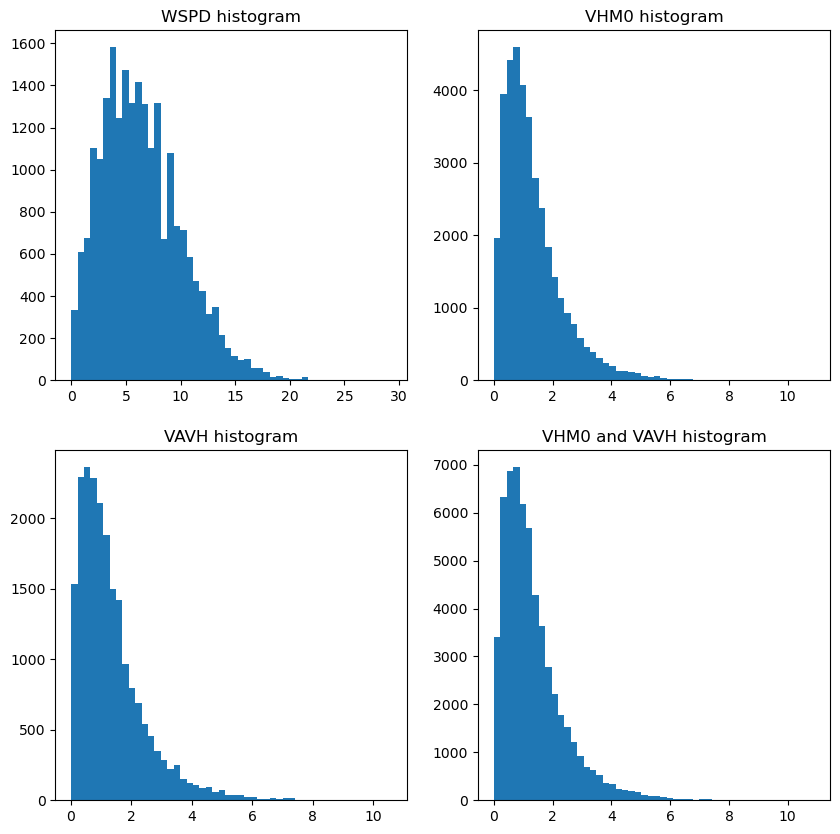

In [16]:
#plot distribution of variable values
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
WSPD_filter = bouy_survey_df['bouy_variable_name'] == 'WSPD'
axs[0,0].hist(bouy_survey_df[WSPD_filter]['bouy_variable_value'], bins=50)
axs[0,0].set_title('WSPD histogram')

VHM0_filter = bouy_survey_df['bouy_variable_name'] == 'VHM0'
axs[0,1].hist(bouy_survey_df[VHM0_filter]['bouy_variable_value'], bins=50)
axs[0,1].set_title('VHM0 histogram')

VAVH_filter = bouy_survey_df['bouy_variable_name'] == 'VAVH'
axs[1,0].hist(bouy_survey_df[VAVH_filter]['bouy_variable_value'], bins=50)
axs[1,0].set_title('VAVH histogram')

VHM0_VAVH_filter = (bouy_survey_df['bouy_variable_name'] == 'VHM0') | (bouy_survey_df['bouy_variable_name'] == 'VAVH')
axs[1,1].hist(bouy_survey_df[VHM0_VAVH_filter]['bouy_variable_value'], bins=50)
axs[1,1].set_title('VHM0 and VAVH histogram')
plt.show()